# SRules

# Statics

In [31]:
import dask.dataframe as dd
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics


## Load Dataset

In [32]:

from notebooks.SRules.read_datasets import read_dataset

filename = "salud-covid"
test_size=0.1
path = f'../..'
dataset_path_name = f'{path}/data/{filename}.csv'
X, y, dataset, target_value_name, pandas_dataset = read_dataset(filename, dataset_path_name)

pandas_dataset.head()

,EMERGENCY_DIA_SHORT_F05,EMERGENCY_DIA_SHORT_J12,EMERGENCY_DIA_SHORT_R06,EMERGENCY_DIA_SHORT_K52,EMERGENCY_DIA_SHORT_I10,EMERGENCY_DIA_SHORT_J22,EMERGENCY_DIA_SHORT_J84,EMERGENCY_DIA_SHORT_E87,EMERGENCY_DIA_SHORT_R09,EMERGENCY_DIA_SHORT_J98,...,ANTECEDENTS_PROC_BW03ZZZ,ANTECEDENTS_PROC_0TPBX0Z,ANTECEDENTS_PROC_F0796FZ,ANTECEDENTS_PROC_4A12X4Z,ANTECEDENTS_PROC_3E03329,SEXO,AGE_LOWER_40,AGE_40_60,AGE_HIGHER_60,RESULT
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,True


In [33]:
#Define dataset
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=test_size, random_state=1)
encoded_train_pandas_dataset = pd.DataFrame(data= np.c_[X_train, y_train], columns= list(dataset['feature_names']) + [target_value_name])
encoded_test_pandas_dataset = pd.DataFrame(data= np.c_[X_test, y_test], columns= list(dataset['feature_names']) + [target_value_name])
print('Sizes (without target):')
print(f'Original size {dataset.data.shape}')
print(f'Train size {X_train.shape}')
print(f'Test size {X_test.shape}')
print(f'encoded_train_pandas_dataset size {encoded_train_pandas_dataset.shape}')
print(f'encoded_test_pandas_dataset size {encoded_test_pandas_dataset.shape}')

Sizes (without target):
Original size (1744, 119)
Train size (1569, 119)
Test size (175, 119)
encoded_train_pandas_dataset size (1569, 120)
encoded_test_pandas_dataset size (175, 120)


## Define Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, make_scorer, recall_score, accuracy_score

# Define scorer
ensemble = RandomForestClassifier(n_estimators=100, criterion="gini")
ensemble.fit(X_train, y_train)

RandomForestClassifier()

## SRules

->FIT
->COUNTER 1


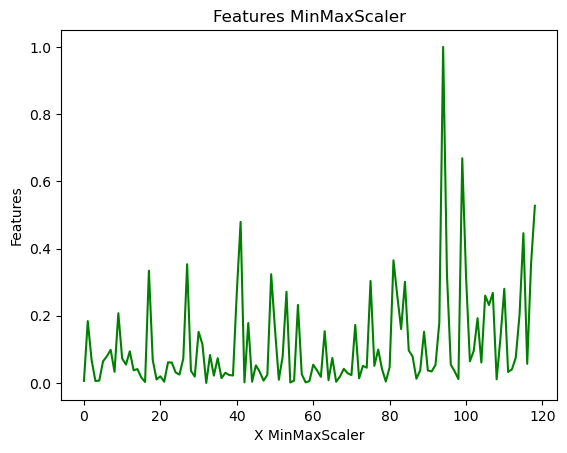

->previous_len: 1569
->new_len: 735
> SRules --  Number of Rules 28:
> SRules --  Number of Minimal Rules 14:
->COUNTER 2


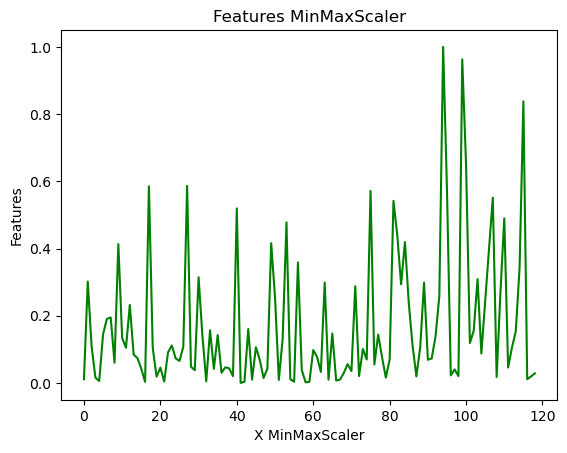

->previous_len: 735
->new_len: 726
> SRules --  Number of Rules 2:
> SRules --  Number of Minimal Rules 1:
->COUNTER 3


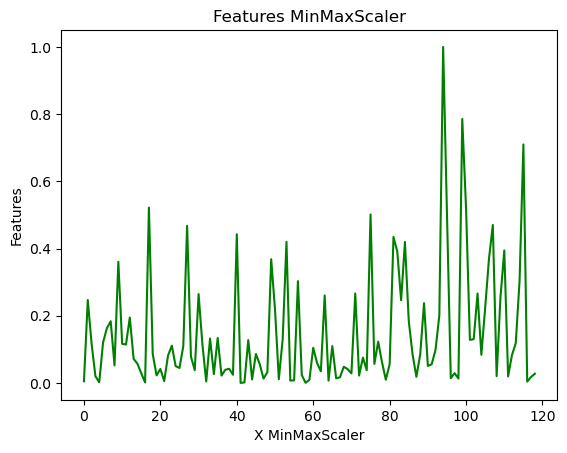

->previous_len: 726
->new_len: 689
> SRules --  Number of Rules 4:
> SRules --  Number of Minimal Rules 2:
->COUNTER 4


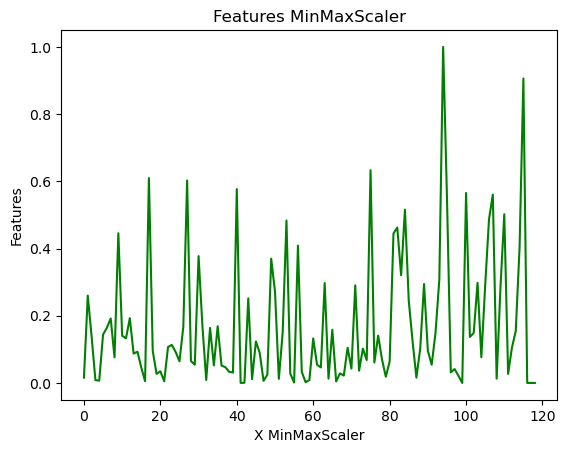

->previous_len: 689
->new_len: 681
> SRules --  Number of Rules 2:
> SRules --  Number of Minimal Rules 1:
->COUNTER 5


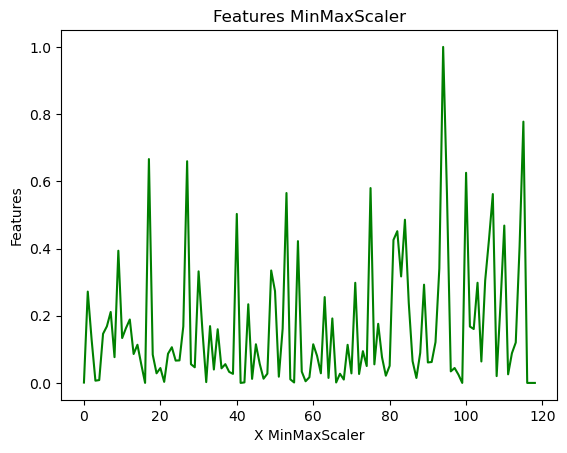

->previous_len: 681
->new_len: 671
> SRules --  Number of Rules 2:
> SRules --  Number of Minimal Rules 1:
->COUNTER 6


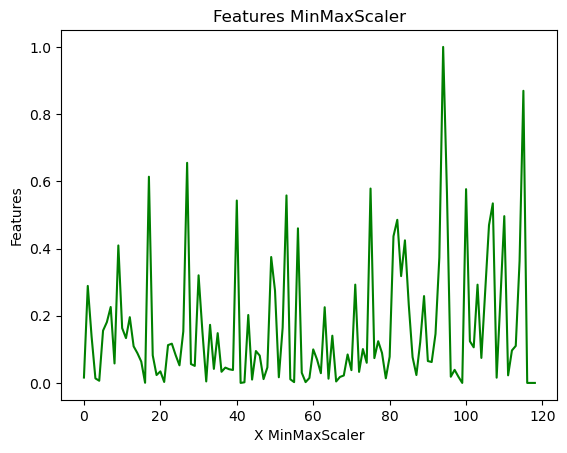

->previous_len: 671
->new_len: 658
> SRules --  Number of Rules 2:
> SRules --  Number of Minimal Rules 1:

->COUNTER 7


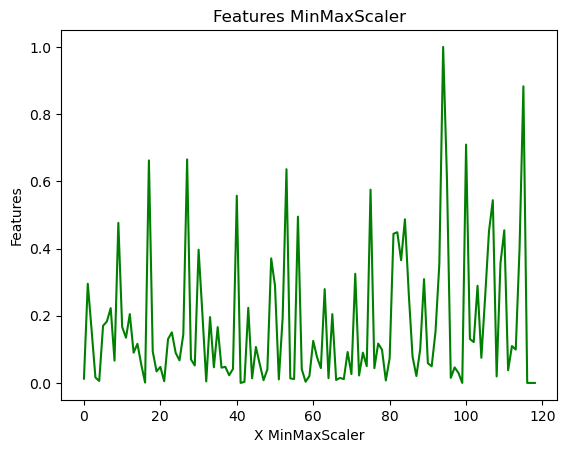

->previous_len: 658
->new_len: 658
> SRules --  Number of Rules 0:
> SRules --  Number of Minimal Rules 0:

Elapsed TOTAL TIME: 183.310 seconds


In [35]:
from SRules.SRules import SRules

import time
start_time = time.time()
rules = SRules(
                feature_names=dataset.feature_names,
                target_value_name = dataset.target_names,
                display_features = True,
                display_logs = False,
                chi_square_percent_point_function = 0.95,
                scale_feature_coefficient = 0.1,
                min_accuracy_coefficient = 0.95,
                min_number_class_per_node = 5
            )
# Fit model
rules.fit(X_train, y_train, encoded_train_pandas_dataset, ensemble.feature_importances_)

elapsed_time = time.time() - start_time
print(f"Elapsed TOTAL TIME: {elapsed_time:.3f} seconds")

# Print Model

In [36]:
print(rules)

> ++++++++++++++++++++++++++++
> SRules --  Number of Rules 20:
> SRules --  Number of Minimal Rules 20:
> ++++++++++++++++++++++++++++
> ------------------------------
 ** Target value: False ** Target: 141 ** Total: 141 ** Accuracy: 1.0 ** Complexity: 7 ** Chi2 critical_value: 3.841458820694124 ** P_value: 0.0003283019614714252
	 Query: ANTECEDENTS_PROC_3E0337Z == False  &  ANTECEDENTS_PROC_3E013NZ == False  &  AGE_HIGHER_60 == False  &  ANTECEDENTS_DIA_SHORT_R99 == False  &  SEXO == False  &  ANTECEDENTS_PROC_3E013GC == False  &  EMERGENCY_DIA_SHORT_J96 == False
> ------------------------------
> ------------------------------
 ** Target value: False ** Target: 51 ** Total: 51 ** Accuracy: 1.0 ** Complexity: 7 ** Chi2 critical_value: 3.841458820694124 ** P_value: 0.016376857017029657
	 Query: ANTECEDENTS_PROC_3E0337Z == False  &  ANTECEDENTS_PROC_3E013NZ == False  &  AGE_HIGHER_60 == False  &  ANTECEDENTS_DIA_SHORT_R99 == False  &  SEXO == True  &  ANTECEDENTS_PROC_3E013GC == True  

# Predict

In [37]:
# ENSEMBLE
y_pred_test_ensemble = ensemble.predict(X_test)

# RULES
y_pred_test_rules = rules.predict(X_test, sorting_method="target_accuracy")

In [38]:
# CATEGORIZABLES
np_array_rules = np.array(y_pred_test_rules)
#not_filter_indices = np.where(np.logical_and(np_array_rules != 0, np_array_rules!=1))[0]
filter_indices = np.where(np_array_rules != None)[0]


np_filterred_y_test = np.array(y_test)[filter_indices]
np_filterred_y_pred_test_ensemble = np.array(y_pred_test_ensemble)[filter_indices]
np_filterred_y_pred_test_rules = np.array(y_pred_test_rules)[filter_indices]
# CHANGE FORMAT IN ORDER TO NOT HAVE PROBLEMS
np_filterred_y_pred_test_rules = np_filterred_y_pred_test_rules.astype('int64')


print(f'DATASET TEST: {len(y_test)}')
print(f'DATASET TEST categorizable: {len(np_filterred_y_test)}')
print('Cobertura:',str("{:.2f}".format(100*(len(np_filterred_y_pred_test_rules)/len(y_test))))+'%')

ensemble_accuracy = metrics.accuracy_score(np_filterred_y_test, np_filterred_y_pred_test_ensemble)
print('RF accuracy:',str("{:.2f}".format(100*ensemble_accuracy))+'%')
ensemble_accuracy = metrics.f1_score(np_filterred_y_test, np_filterred_y_pred_test_ensemble)
print('RF F1-score:',str("{:.2f}".format(100*ensemble_accuracy))+'%')
rules_accuracy = metrics.accuracy_score(np_filterred_y_test, np_filterred_y_pred_test_rules)
print('Rules Accuracy:',str("{:.2f}".format(100*rules_accuracy))+'%')
rules_accuracy = metrics.f1_score(np_filterred_y_test, np_filterred_y_pred_test_rules)
print('Rules F1-score:',str("{:.2f}".format(100*rules_accuracy))+'%')
rules_accuracy = metrics.roc_auc_score(np_filterred_y_test, np_filterred_y_pred_test_rules)
print('Rules roc_auc_score:',str("{:.2f}".format(100*rules_accuracy))+'%')


DATASET TEST: 175
DATASET TEST categorizable: 97
Cobertura: 55.43%
RF accuracy: 96.91%
RF F1-score: 76.92%
Rules Accuracy: 95.88%
Rules F1-score: 71.43%
Rules roc_auc_score: 84.60%


# SHAP explainer

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


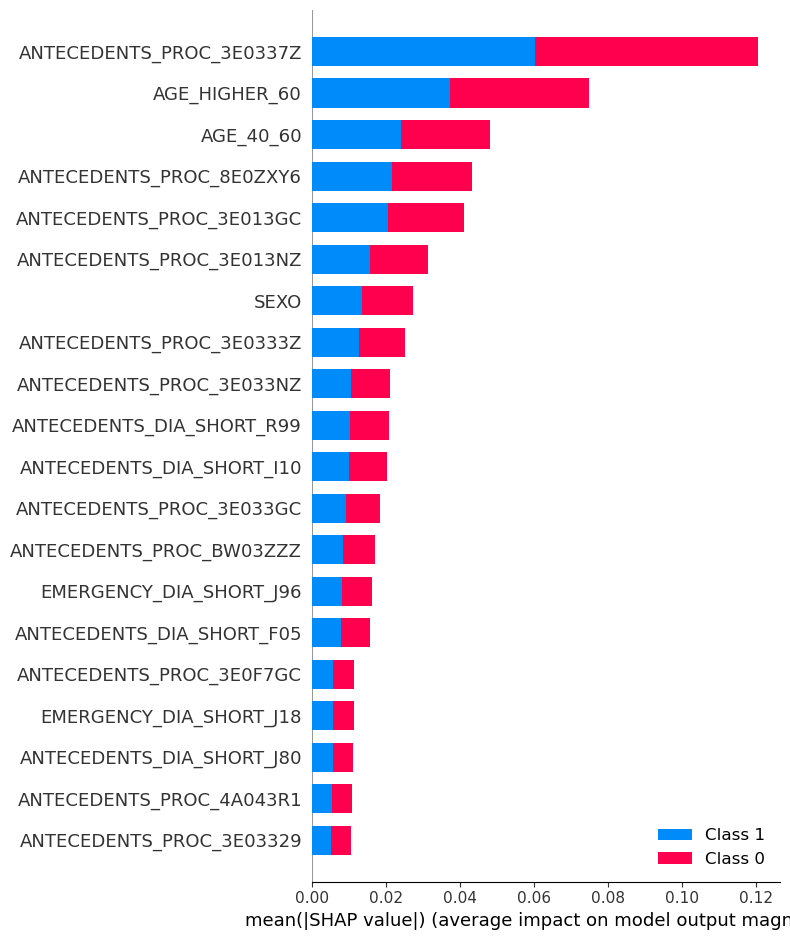

In [39]:
import shap

# Create Tree Explainer object that can calculate shap values
explainer = shap.TreeExplainer(ensemble)

# Evaluate SHAP values
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_train, feature_names=dataset.feature_names)


In [40]:

shap.summary_plot(shap_values, X_train, feature_names=dataset.feature_names, plot_type="dot")

AssertionError: Only plot_type = 'bar' is supported for multi-output explanations!